<h1 align="center">Urdu Twitter Sentiment Analysis</h1>
<h4>This project focuses on the development of an **Automatic Sentiment Analysis Tool** for **Urdu Text** from social media platforms such as Twitter and YouTube. The dataset, *Urdu Twitter Sentiment Dataset*, is used to classify posts into positive, negative, or neutral sentiments. This tool will assist brands, influencers, and businesses in understanding customer feedback, public opinion, and audience engagement by processing the complexity of Urdu text. The project is beneficial for gauging sentiment in a language with limited NLP resources, making it valuable for expanding sentiment analysis to Urdu-speaking users.</h4>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import nltk.corpus as stopwords
import emoji
import string
import re

# Load Dataset of Sentiment analysis

In [13]:
df=pd.read_csv("urdu_sarcastic_dataset.csv")

In [15]:
df.head(5)

,urdu_text,is_sarcastic,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,نہیں پائین 😎,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,`` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...,1.0,NaN,NaN,NaN,NaN,NaN,NaN


# Drop undesire Columns

In [223]:
# Drop the specified columns directly 
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7"])


In [225]:
df["is_sarcastic"]=df["is_sarcastic"].dropna()

In [227]:
df["urdu_text"]=df["urdu_text"].dropna()

In [229]:
len(df)

20060

In [230]:
df.urdu_text[1]

'چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی آں میں😂😂'

In [232]:
len(df.urdu_text[1])

55

In [234]:
df["urdu_text"]=df["urdu_text"].dropna()

In [237]:
df["is_sarcastic"].unique()

array([ 1.,  0., nan])

In [239]:
df.isnull().sum()

urdu_text       105
is_sarcastic     56
dtype: int64

In [240]:
df = df.dropna(how='all')


In [241]:
df.is_sarcastic=df.is_sarcastic.astype(int)

,urdu_text,is_sarcastic
0,🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...,1
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0
3,نہیں پائین 😎,0
4,`` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...,1
...,...,...
19999,راجہ صاحب نے توڑ سنگ تکر کر چھڈیا۔۔۔ ہن آواز ن...,1
20000,اور اس کے بعد بےبی پرائم منسٹر بن گئی۔۔🤣😂🤣🤣😁😁,1
20001,اتنا بونگا وزیر اعظم ڈھونڈنے سے بھی نہیں ملے گا 😌,1
20002,کاکا جب تم نے عِدت پوری نہیں ہونے دی 🤭 تو عوام...,1


# Frequancy Distibuation Visualization Graphs

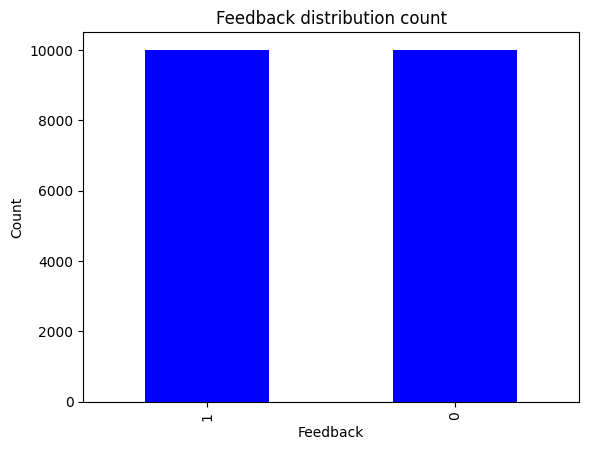

In [245]:
#Bar graph to visualize the total counts of each feedback

df['is_sarcastic'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distrubution of feedback'>

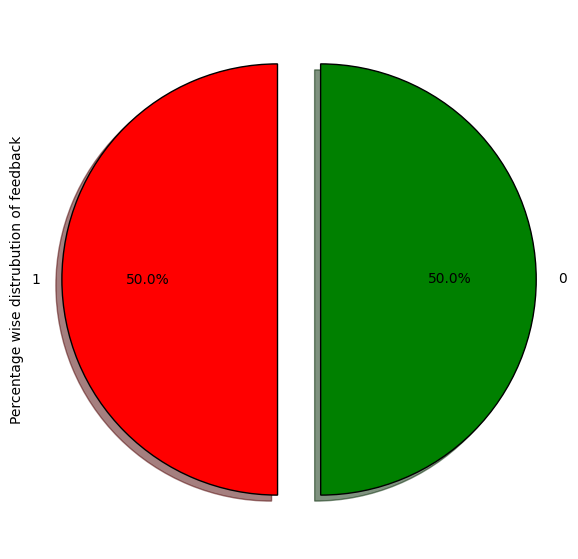

In [246]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['is_sarcastic'].value_counts()/df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

# Cleaned dataset

In [252]:
df.sample(4)

,urdu_text,is_sarcastic
16766,بھائی اس کا شہید بنتا ہی نہیں اس کو سنسار کرو 😷,0
19822,دوست نے کہا سستے گھر دے رہی حکومت .. ذرا آنلائ...,0
342,مادر ملت نہیں مادر زلت ہے یہ 😂,1
18881,@NidaKirmany @Aakbar84 🤣🤣🤣 زبردست ۔۔۔میں کچھ ل...,1


<h1 align="center">Using NLP technique Data cleaning</h1>

# Remove stopwords

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20004 entries, 0 to 20003
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   urdu_text     19955 non-null  object
 1   is_sarcastic  20004 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 390.7+ KB


In [258]:
file_path = "stopwords_urdu_single_line.txt" 

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords_content = file.read()
        stopwords_list = [word.strip() for word in stopwords_content.replace(',', ' ').split()]
        
    print(stopwords_list)

except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path.")


['بھی', 'خو', 'گی', 'اپنے', 'گئے', 'بہت', 'طرف', 'ہوچکی', 'پائے', 'اپنا', 'دوسری', 'گیا', 'کہ', 'گیا', 'بھی', 'سے', 'ہر', 'پر', 'اش', 'دی', 'گے', 'لگیں', 'ہے', 'بعد', 'سکتے', 'وہ', 'تھی', 'ان', 'دیا', 'لیے', 'والے', 'یہ', 'بدائے', 'سکتی', 'نے', 'تھا', 'اندر', 'ذریعے', 'لگی', 'ہوچکا', 'ہونے', 'باہر', 'سکتا', 'نہیں', 'تو', 'اور', 'رہا', 'لگے', 'ہوسکتا', 'ہوں', 'کب', 'ہوئے', 'تمام', 'کیا', 'اپنے', 'رہی', 'مگر', 'ہوسکتی', 'ہیں', 'کریں', 'ہو', 'تک', 'کی', 'ایک', 'رہے', 'ہیں', 'ہوسکتے', 'کئی', 'ہونا', 'تت', 'کہ', 'ہوا', 'آئے', 'ثبت', 'نا', 'تھے', 'کیوں', 'ہوتا', 'نہ', 'خط', 'کے', 'پھر', 'غیر', 'خبر', 'رکھ', 'کتاب', 'کوئی', 'ذریعے', 'بڑے', 'خواب', 'اضطراب', 'بلکہ', 'خشکہ', 'رکھتا', 'کیطرف', 'بزرگ', 'خبر', 'ذریعہ', 'کئی', 'از', 'بند', 'خاص', 'رکھتاہوں', 'کیلئے', 'بئیں', 'تہیں', 'دوسرے', 'کررہی', 'ازکی', 'بچ', 'خوکہ', 'رکھتی', 'کیونکہ', 'دونوں', 'کررہے', 'خبر', 'ذرا', 'ازکے', 'پچھلا', 'خطاب', 'رکھتے', 'کےبعد', 'توہی', 'دوران', 'کررہا', 'یہاں', 'آش', 'انہیں', 'بے', 'پساند', 'تھوڑا', 'چکے', 'ذکر'

In [259]:
len(df.urdu_text[1])

55

In [262]:
def cleaned_Data(text):
    clean_data=[token for token in text if token not in   stopwords_list]
    return clean_data


In [264]:
def remove_emojis_data(text):
    remove_emojis=emoji.replace_emoji(df.urdu_text,replace='')
    return remove_emojis


In [266]:
df['urdu_text']=df.urdu_text.astype('str')

# Remove English letters and Numbers

In [269]:
def clean_urdu_text(text):
    # Define a regex pattern for cleaning
    pattern = r'[^ء-ی\s]'  # Matches anything that is NOT an Urdu letter or a space
    
    # Apply the pattern
    cleaned_text = re.sub(pattern, '', text)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text

# Sample Urdu sentence
df['urdu_text'] = df['urdu_text'].apply(clean_urdu_text)

# Remove Emojis

In [270]:

def remove_emojis_data(text):
    if isinstance(text, str): 
        return emoji.replace_emoji(text, replace='')
    else:
        return text 
df['urdu_text'] = df['urdu_text'].apply(remove_emojis_data)



# Remove Stop Words

In [273]:
len(df.urdu_text[1])

53

In [275]:
def remove_stopwords(text):
    if isinstance(text, str):
        tokens = text.split()
        
        cleaned_data = [token for token in tokens if token not in stopwords_list]
        return " ".join(cleaned_data)
    return text  
df['urdu_text'] = df['urdu_text'].apply(remove_stopwords)

In [277]:
len(df.urdu_text[1])

53

In [278]:
df.urdu_text[11]

'پائن دوبارہ فالو کرئی'

# Remove Punctuation

In [279]:
def remove_punctuation(text):
    if isinstance(text, str):
        all_punctuation = string.punctuation + '؟،۔!"#$%&\'()*+,-./...:;<=>?@[\\]^_`{|}~'
        text = text.translate(str.maketrans('', '', all_punctuation))
        return text
    return text  


In [284]:
df['urdu_text'] = df['urdu_text'].apply(remove_punctuation)

In [285]:
df

,urdu_text,is_sarcastic
0,لین د میری شادی فسادن ٹھیک ہ کوجی چاہی,1
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0
3,پائین,0
4,مراد علی شاہ ک بھیس میں ڈی جی ایس تھ حامد میر,1
...,...,...
19999,راجہ صاحب ن توڑ سنگ تکر کر چھڈیا ہن آواز نئی ن...,1
20000,اس ک ببی پرائم منسٹر گئی,1
20001,اتنا بونگا وزیر اعظم ڈھونڈن س مل گا,1
20002,کاکا جب تم ن عِدت پوری ہون عوام کیس تیری مدت پ...,1


In [286]:
df.urdu_text[11]

'پائن دوبارہ فالو کرئی'

In [290]:

def remove_links_emails_hashtags(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    text = re.sub(r'#\S+', '', text)
    return text


In [292]:
df['urdu_text'] = df['urdu_text'].apply(remove_links_emails_hashtags)

# Eliminate short length sentence length<3

In [295]:
def filter_short_posts(post):
    if isinstance(post, str):
       
        if len(post.split()) > 3:
            return post
    return None  
df['urdu_text'] = df['urdu_text'].apply(filter_short_posts)

df = df[df['urdu_text'].notnull()]


df.reset_index(drop=True, inplace=True)

df


,urdu_text,is_sarcastic
0,لین د میری شادی فسادن ٹھیک ہ کوجی چاہی,1
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0
3,مراد علی شاہ ک بھیس میں ڈی جی ایس تھ حامد میر,1
4,قابل اعتبار ہی قاتل اعتبار ہوت,1
...,...,...
18024,راجہ صاحب ن توڑ سنگ تکر کر چھڈیا ہن آواز نئی ن...,1
18025,اس ک ببی پرائم منسٹر گئی,1
18026,اتنا بونگا وزیر اعظم ڈھونڈن س مل گا,1
18027,کاکا جب تم ن عِدت پوری ہون عوام کیس تیری مدت پ...,1


In [297]:
df['urdu_text'] = df['urdu_text'].apply(filter_short_posts)

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_19636\2127291639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['urdu_text'] = df['urdu_text'].apply(filter_short_posts)


In [325]:
df

,urdu_text,is_sarcastic
0,لین میر شاد فسادن ٹھیک کوج چاہ,1
1,چ مہمان م کھان سر چڑی چاچ ن دسد آ م,1
2,کامران خان آپک رات بھری زم دار لگائ گئ اپوزیشن...,0
3,مرا عل شا ک بھیس م ڈ ج ایس ت حام می,1
4,قاب اعتب ہ قات اعتب ہوت,1
...,...,...
18024,راج صاحب ن تو سن ت چھڈی ہن آوا نئ نک رئ یوتھی,1
18025,اس ک بب پرائ منسٹ گئ,1
18026,اتن بونگ وزی اعظ ڈھونڈن س م گ,1
18027,کاک جب ن عدت پور ہون عوا کیس تیر مدت پور ہون,1


# Stemming and Lemmatization 

<h3>In the code you provided, the process already includes stemming, but it does not handle lemmatization explicitly. Unfortunately, Urduhack does not have a separate built-in function for lemmatization like it does for stemming. However, you can integrate both stemming and normalization (as a form of lightweight lemmatization).

In Urdu, true lemmatization requires a dictionary lookup approach, which is not fully supported yet. Still, you can apply the same stemming and normalization process together as a combined effort.

Here’s how you can apply both stemming and normalization (which can act as a basic form of lemmatization) in your provided code</h3>

In [329]:
import re
import urduhack
from urduhack.normalization import normalize

# Custom stemming function
def custom_stem(word):
    # Basic rule-based stemming: removing suffixes
    suffixes = [
        'وں', 'یں', 'ہ', 'ے', 'ی', 'ا', 'و', 'اں', 'ات', 'یت', 'گی', 'ش', 'واں', 
        'ہٹ', 'وری', 'کر', 'ار', 'اک', 'یتیں', 'گیوں', 'ائے', 'وات', 'ہوتا', 
        'یگی', 'وگی', 'واتیں', 'وں', 'تے', 'اتا', 'انہ', 'و', 'ا', 'اڑ', 'واں',
        'یاں', 'کو', 'والا', 'ووں', 'انے', 'اوا', 'جائے', 'کار', 'ی', 'ہا', 
        'تم', 'ائی', 'یئے', 'ئیں', 'اگا', 'گا', 'وا', 'نا', 'تا', 'پا', 'رہا', 
        'بی', 'دی', 'یئے', 'یوں', 'اؤں', 'چکا', 'ہی', 'چکی', 'لیا', 'ؤں', 'ڑ', 
        'چا', 'چھا', 'ڈا', 'ڑھ', 'یوں', 'کہ', 'ے', 'ر', 'کی', 'میں', 'نا', 'وا', 
        'تے', 'انا', 'ئو', 'کو', 'جو', 'تک', 'تر', 'پن', 'ند', 'دار', 'ش', 'اری',
        'وں', 'شوں', 'ف', 'م', 'ں', 'ل', 'پے', 'سے', 'دا', 'تی', 'گ', 'نا', 
        'او', 'کن', 'لی', 'ری', 'ڑھ', 'تا', 'کیں', 'ائی', 'چک', 'چی', 'رکا', 
        'چو', 'دیں', 'گیا', 'گئیں', 'آ', 'او', 'لٹ', 'گئے', 'رکھا', 'رکھیں', 
        'کھ', 'کھا', 'پہ', 'چڑھ', 'پو', 'ڑے', 'چلے', 'اٹھ', 'پ', 'وا', 'نے', 
        'ریا', 'ڑ', 'ور', 'یئے', 'ئی', 'لی', 'گا', 'رے', 'رہا', 'رہی', 'چکا', 
        'چکی', 'گئے', 'دیا', 'رک', 'پڑ', 'نے', 'آئیں', 'آئی', 'آئے', 'آتا', 
        'لات', 'لا', 'ؤں', 'ئ', 'ڑھ', 'چ', 'ھ', 'ف', 'گے', 'ج', 'پ', 'د', 'ل', 
        'یئے', 'ز', 'مے', 'آر', 'سر', 'کم', 'کھل', 'سک', 'گئے', 'کھا', 'پری', 
        'ؤں', 'جھٹ', 'بک', 'ڈھ', 'ہی', 'چلا', 'بل', 'آیا', 'اٹ', 'آئیں', 'جو',
        'تی', 'آٹھ', 'لٹ', 'ا', 'و'
    ]

    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]  # Remove the suffix and return the root
    return word

# Example usage
sample_urdu_word = "کتابوں"
stemmed_word = custom_stem(sample_urdu_word)
print("Original:", sample_urdu_word)
print("Stemmed:", stemmed_word)


Original: کتابوں
Stemmed: کتاب


In [442]:

# Custom lemmatization function
def custom_lemmatize(word):
    # Rule-based lemmatization dictionary for common words
    lemmatization_dict = {
    'کتابیں': 'کتاب',  # Plural to singular
    'خوبصورت': 'خوبصورتی',  # Adjective to noun
    'ہوں': 'ہونا',  # Verb to base form
    'لڑکیاں': 'لڑکی',  # Plural to singular
    'بچے': 'بچہ',  # Plural to singular
    'کر رہا': 'کرنا',  # Verb phrase to base form
    'کر رہے': 'کرنا',
    'دیکھ رہا': 'دیکھنا',
    'دیکھ رہے': 'دیکھنا',
    'چل رہی': 'چلنا',
    'چل رہے': 'چلنا',
    'گئی': 'جانا',  # Past tense to infinitive
    'گیا': 'جانا',
    'ہوگیا': 'ہونا',
    'کرتا': 'کرنا',
    'کرتی': 'کرنا',
    'کرتے': 'کرنا',
    'چلتی': 'چلنا',
    'چلتے': 'چلنا',
    'دیتا': 'دینا',
    'دیتی': 'دینا',
    'جاتا': 'جانا',
    'جاتی': 'جانا',
    'کھاتا': 'کھانا',  # Base form for common verbs
    'کھاتے': 'کھانا',
    'کھاتی': 'کھانا',
    'لکھتا': 'لکھنا',
    'لکھتی': 'لکھنا',
    'لکھتے': 'لکھنا',
    'پڑھتا': 'پڑھنا',
    'پڑھتی': 'پڑھنا',
    'پڑھتے': 'پڑھنا',
    'سمجھتا': 'سمجھنا',
    'سمجھتی': 'سمجھنا',
    'سمجھتے': 'سمجھنا',
    'کیا': 'کرنا',
    'کرتے': 'کرنا',
    'رہا': 'رہنا',
    'رہے': 'رہنا',
    'چاہیے': 'چاہنا',
    'دیکھا': 'دیکھنا',
    'دیکھا': 'دیکھنا',
    'دیکھی': 'دیکھنا',
    'چل': 'چلنا',
    'کھاؤ': 'کھانا',
    'کرو': 'کرنا',
    'جاؤ': 'جانا',
    'کھاؤ': 'کھانا',
    'سنا': 'سننا',
    'سننا': 'سننا',
    'کہا': 'کہنا',
    'کہی': 'کہنا',
    'سنو': 'سننا',
    'کسی': 'کوئی',
    'سب': 'سب',
    'نئے': 'نیا',
    'نئی': 'نیا',
    'پرانے': 'پرانا',
    'پہلے': 'پہلا',
    'اچھے': 'اچھا',
    'اچھی': 'اچھا',
    'برا': 'برا',
    'بہتر': 'بہترین',
    'خوفناک': 'خوف',
    'بدتر': 'بدترین',
    'محبت': 'پیار',
    'نفرت': 'ناراضگی',
    'دوست': 'دوستی',
    'دشمن': 'دشمنی',
    'حقیقت': 'سچ',
    'جھوٹ': 'جھوٹا',
    'فائدہ': 'مفید',
    'خطرناک': 'خطرہ',
    'تیز': 'تیزی',
    'سست': 'سستی',
    'جلدی': 'جلدی',
    'آہستہ': 'آہستگی',
    'کھانا': 'کھانے',
    'سونا': 'سونے',
    'پڑھائی': 'پڑھنا',
    'تحریر': 'لکھنا',
    'بولنا': 'بول',
    'گفتگو': 'بات چیت',
    'خبر': 'خبریں',
    'شادی': 'شادی کرنا',
    'رشتہ': 'رشتے',
    'معافی': 'معاف',
    'شکایت': 'شکایت کرنا',
    'پیار': 'محبت',
    'سفر': 'سفر کرنا',
    'محنت': 'کام کرنا',
    'امید': 'امید کرنا',
    'خواب': 'خواب دیکھنا',
    'کامیابی': 'کامیاب',
    'ناکامی': 'ناکام',
    'دوڑ': 'دوڑنا',
    'سوچ': 'سوچنا',
    'تجربہ': 'تجربہ کرنا',
    'مشق': 'عمل',
    'بہت': 'زیادہ',
    'کم': 'کمترین',
    'دن': 'رات',
    'شام': 'رات',
    'صبح': 'دن',
    'پہلا': 'ابتدائی',
    'آخر': 'آخری',
    'خود': 'اپنا',
    'اگلا': 'آگے',
    'پچھلا': 'پیچھے',
    'چیزیں': 'چیز',
    'سب': 'سبھی',
    'وقت': 'ٹائم',
    'دنیا': 'زمین',
    'اللہ': 'خدا',
    'آدمی': 'شخص',
    'عورت': 'خاتون',
    'بچہ': 'بچوں',
    'لڑکی': 'لڑکیاں',
    'لڑکا': 'لڑکے',
    'بوڑھا': 'بزرگ',
    'نوجوان': 'جوان',
    'چھوٹا': 'چھوٹے',
    'خوشی': 'خوش',
    'غم': 'اداسی',
    'درد': 'تکلیف',
    'پیار': 'محبت',
    'نفرت': 'غصہ',
    'امید': 'یقین',
    'شک': 'شبہ',
    'سوچنا': 'غور',
    'کوشش': 'محنت',
    'رہنا': 'زندگی',
    'مرنا': 'موت',
    'دوستی': 'دوست',
    'دشمنی': 'دشمن',
    'صبر': 'برداشت',
    'غصہ': 'ناراض',
    'بھوک': 'بھوکا',
    'پیاس': 'پینا',
    'چاہنا': 'خواہش',
    'محنت': 'کام',
    'پیسہ': 'روپیہ',
    'سونا': 'نیند',
    'خواب': 'خواب',
    'دعا': 'عبادت',
    'ملاقات': 'ملنا',
    'خاندان': 'رشتے',
    'مسئلہ': 'مشکل',
    'مشورہ': 'رائے',
    'فائدہ': 'نفع',
    'نقصان': 'خسارہ',
    'بدتر': 'برا',
    'بہتر': 'اچھا',
    'حق': 'سچ',
    'باطل': 'جھوٹ',
    'سچائی': 'حقیقت',
    'جھوٹ': 'فریب',
    'خوبصورت': 'حسن',
    'بدصورت': 'بدصورتی',
    'کتابیں': 'کتاب',  
    'خوبصورت': 'خوبصورتی', 
    'ہوں': 'ہونا',  
    'ہیں': 'ہونا',  
    'ہو': 'ہونا',  
    'تھے': 'ہونا',  
    'تھا': 'ہونا',  
    'آیا': 'آنا',  
    'گئے': 'جانا',  
    'آئی': 'آنا',  
    'کیا': 'کرنا',  
    'دیا': 'دینا',  
    'لیا': 'لینا',  
    'گیا': 'جانا',  
    'دیتا': 'دینا',  
    'رہا': 'رہنا',  
    'رہی': 'رہنا',  
    'رہے': 'رہنا',  
    'کھایا': 'کھانا',  
    'پیا': 'پینا',  
    'دیکھا': 'دیکھنا',  
    'چلا': 'چلنا',  
    'لکھا': 'لکھنا',  
    'کہا': 'کہنا',  
    'سنا': 'سننا',  
    'جا': 'جانا',  
    'رکا': 'رکنا',  
    'دوڑ': 'دوڑنا',  
    'بولا': 'بولنا',  
    'پوچھا': 'پوچھنا',  
    'سو': 'سونا',  
    'جاگ': 'جاگنا',  
    'اٹھ': 'اٹھنا',  
    'بیٹھ': 'بیٹھنا',  
    'چمکا': 'چمکنا',  
    'کھل': 'کھلنا',  
    'پھل': 'پھلنا',  
    'جل': 'جلنا',  
    'جلایا': 'جلانا',  
    'جلتی': 'جلنا',  
    'کھینچا': 'کھینچنا',  
    'چکھا': 'چکھنا',  
    'چھوڑا': 'چھوڑنا',  
    'پھینکا': 'پھینکنا',  
    'اڑ': 'اڑنا',  
    'پکڑا': 'پکڑنا',  
    'چھو': 'چھونا',  
    'مار': 'مارنا',  
    'کودا': 'کودنا',  
    'چکھ': 'چکھنا',  
    'گرا': 'گرنا',  
    'جھوٹ': 'جھوٹا',  
    'سچ': 'سچا',  
    'گہرا': 'گہرائی',  
    'اونچا': 'اونچائی',  
    'چھوٹا': 'چھوٹائی',  
    'تنگ': 'تنگی',  
    'چوڑا': 'چوڑائی',  
    'موٹا': 'موٹائی',  
    'پتلا': 'پتلاپن',  
    'پیار': 'محبت',  
    'نفرت': 'نفر',  
    'دوست': 'دوستی',  
    'دشمن': 'دشمنی',  
    'زندگی': 'حیات',  
    'موت': 'وفات',  
    'خواب': 'نیند',  
    'چاہت': 'خواہش',  
    'حالت': 'کیفیت',  
    'ضرورت': 'احتیاج',  
    'بیمار': 'بیماری',  
    'صحتمند': 'صحت',  
    'خوش': 'خوشی',  
    'اداس': 'اداسی',  
    'دلچسپ': 'دلچسپی',  
    'پیارا': 'پیار',  
    'مشکل': 'مشکلات',  
    'آسان': 'آسانی',  
    'شاندار': 'شانداری',  
    'بدصورت': 'بدصورتی',  
    'لمبا': 'لمبائی',  
    'چھوٹا': 'چھوٹائی',  
    'زیادہ': 'زیادتی',  
    'کم': 'کمی',  
    'طاقتور': 'طاقت',  
    'کمزور': 'کمزوری',  
    'عقل': 'عقلمندی',  
    'بہادر': 'بہادری',  
    'بزدل': 'بزدلی',  
    'امیر': 'امیری',  
    'غریب': 'غربت',  
    'دانشمند': 'دانش',  
    'استاد': 'استادی',  
    'طالبعلم': 'تعلیم',  
    'کھلاڑی': 'کھیل',  
    'فنکار': 'فن',  
    'فن': 'فنون',  
    'نرمی': 'نرم',  
    'سخت': 'سختی',  
    'دیر': 'دیرینہ',  
    'جلدی': 'جلد',  
    'قریب': 'قربت',  
    'دور': 'دوری',  
    'بڑا': 'بڑائی',  
    'نیا': 'نیاپن',  
    'پرانا': 'پراناپن',  
    'نرم': 'نرمی',  
    'سرد': 'سردی',  
    'گرم': 'گرمی',  
    'آسمان': 'فلک',  
    'زمین': 'ارض',  
    'سمندر': 'بحر',  
    'دریا': 'دریائی',  
    'جنگل': 'بیابان',  
    'پہاڑ': 'پہاڑوں',  
    'بیابان': 'جنگل',  
    'خاندان': 'اہل',  
    'گھر': 'مکان',  
    'محل': 'قصرف',  
    'چھت': 'چھتیں',  
    'کمرہ': 'کمرے',  
    'دروازہ': 'دروازے',  
    'کھڑکی': 'کھڑکیاں',  
    'بچپن': 'بچپن',  
    'جوانی': 'جوان',  
    'بوڑھا': 'بوڑھاپا',  
    'دوپہر': 'دوپہری',  
    'رات': 'راتیں',  
    'سفید': 'سفیدی',  
    'کالا': 'کالاپن',  
    'لال': 'لالی',  
    'سبز': 'سبزی',  
    'نیلا': 'نیلاپن',  
    'پیلا': 'پیلاپن',  
    'گلابی': 'گلابی',  
    'سنہرا': 'سنہری',  
    'چمکدار': 'چمک',  
    'مدھم': 'مدھم',  
    'خاموش': 'خاموشی',  
    'شور': 'شورشرابہ',  
    'پانی': 'آب',  
    'آگ': 'آتش',  
    'ہوا': 'ہوائیں',  
    'زمین': 'زمینیں',  
    'میدان': 'میدانی',  
    'خالی': 'خالیپن',  
    'بھرا': 'بھری',  
    'گندہ': 'گند',  
    'صاف': 'صفائی',  
    'خوشبو': 'خوشبویات',  
    'بدبو': 'بدبوئیں',  
    'صبح': 'صبحیں',  
    'صبحانہ': 'ناشتہ',  
    'کھانا': 'کھانے',  
    'چائے': 'چائےپانی',  
    'روٹی': 'روٹیاں',  
    'دودھ': 'دودھ',  
    'چاول': 'چاول',  
    'پانی': 'پینے',  
    'ناریل': 'ناریلی',  
    'نمک': 'نمکی',  
    'میٹھا': 'میٹھائی',  
    'کھٹا': 'کھٹاپن',  
    'تلخ': 'تلخی',  
    'گرم': 'گرم',  
    'سرد': 'سردی',  
    'مرچ': 'مرچیں',  
    'مسالہ': 'مسالے',  
    'پیار': 'محبت',  
    'نفرت': 'نفر',  
    'زندگی': 'حیات',  
    'موت': 'وفات'
}

    return lemmatization_dict.get(word, word)

def urdu_stem_lemmatize(text):
    normalized_text = normalize(text)
    
    words = normalized_text.split()
    
    processed_words = []
    for word in words:
        stemmed_word = custom_stem(word)  
        lemmatized_word = custom_lemmatize(stemmed_word)  
        processed_words.append(lemmatized_word)
    
    processed_sentence = ' '.join(processed_words)
    
    return processed_sentence

df['Lemmatize'] = df['urdu_text'].apply(urdu_stem_lemmatize)


KeyError: 'urdu_text'

In [444]:
df

,Sentiments,Target,tokenized_text
15799,انسان جس پوسٹ سبھ ک مت بتان نظ ج پوچھن تس...,1,"[انسان, جس, پوسٹ, سبھ, ک, مت, بتان, نظ, ج, پوچ..."
8384,پینڈ ب ب لو د زند چلت روڈ کان بوت جان بو توڑن...,0,"[پینڈ, ب, ب, لو, د, زند, چلت, روڈ, کان, بوت, ج..."
2778,پاکستان سون ل پاکستان ک ک,1,"[پاکستان, سون, ل, پاکستان, ک, ک]"
13874,نیاپن اپنبیان قا تواس بس کیاگرنٹ یوتھ ک فری,1,"[نیاپن, اپنبیان, قا, تواس, بس, کیاگرنٹ, یوتھ, ..."
6083,عرض ووٹ ک عزت محض بہان اص م ک پیس بچان,1,"[عرض, ووٹ, ک, عزت, محض, بہان, اص, م, ک, پیس, ب..."
...,...,...,...
8019,دھ اس ڈھڈ مشین بلد و اسکوٹ پرل آت,0,"[دھ, اس, ڈھڈ, مشین, بلد, و, اسکوٹ, پرل, آت]"
14853,ت نو شر ک زی کران ا کیپٹن صف ک ہی بن,1,"[ت, نو, شر, ک, زی, کران, ا, کیپٹن, صف, ک, ہی, بن]"
4912,جان محک پ ملک س س ایس ک کرت ب رن ہات پک,1,"[جان, محک, پ, ملک, س, س, ایس, ک, کرت, ب, رن, ہ..."
11392,میر نو کی خ ایس کہن مر توہین لین لارڈ نان اس ...,1,"[میر, نو, کی, خ, ایس, کہن, مر, توہین, لین, لار..."


# Apply the Feature EXTRACTION


In [335]:
df['urdu_text'][100]

'باج چھ س ک قربت میڈ د پچ  سا ساتن پاکستان فتح کشم فتح کرن  با ہ ک کھ س  پو '

In [337]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [339]:
tfidf=TfidfVectorizer()

In [341]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

In [343]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\FAST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [346]:
def urdu_tokenizer(text):
    return word_tokenize(text)
tfidf = TfidfVectorizer(
    tokenizer=urdu_tokenizer, 
    max_features=1000 
)

In [349]:
len(df)

18029

In [351]:
df['Sentiments']=df['urdu_text']

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_19636\3139148672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiments']=df['urdu_text']


In [353]:
df['Target']=df['is_sarcastic']

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_19636\733734490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target']=df['is_sarcastic']


In [355]:
df = df.drop(columns=["urdu_text", "is_sarcastic"])

In [357]:
df

,Sentiments,Target
0,لین می شا فسادن ٹھیک کو چا,1
1,مہمان کھان س چڑ چا ن دس,1
2,کامران خان آپک ر بھر ز د لگا گ اپوزیشن کر ک او...,0
3,مر ع ش ک بھیس ڈ ایس ت حا م,1
4,قاب اعتب ق اعتب ہوت,1
...,...,...
18024,را صاحب ن ت سن ت چھڈ ہن آو ن نک ر یوتھ,1
18025,اس ک بب پرا منسٹ گ,1
18026,اتن بون وز اعظ ڈھونڈن س,1
18027,ک جب ن عدت پو ہون عو کیس تی مدت پو ہون,1


In [359]:
df=df.sample(500)

In [361]:
# # Fit and transform the Urdu text data
x_vectorized = tfidf.fit_transform(df['Sentiments'])


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Import Model fitting libraries

In [363]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


# train_test_split

In [365]:
X_train,X_test,y_train,y_test=train_test_split(x_vectorized,df.Target,random_state=2)

<h1 align="center" style="color:red;"> Word2Vec  Training: </h1>
<h3 style="color:blue;">The Word2Vec model is trained on the tokenized Urdu sentences. The model will create vector representations of each word.
Parameters such as vector_size, window, and min_count can be adjusted for better accuracy.
Find Similar Words:
The function find_top_similar_words finds the top n similar words for a given word based on their vector similarity.</h3>


In [367]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Tokenization of Urdu text column in your dataset
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to each sentence in the dataset
df['tokenized_text'] = df['Sentiments'].apply(tokenize_text)

# Train Word2Vec model on tokenized sentences
tokenized_sentences = df['tokenized_text'].tolist()  # Convert column to list of tokenized sentences
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to get top 5 similar words for a given word
def get_similar_words(word, top_n=5):
    try:
        similar_words = model.wv.most_similar(word, topn=top_n)
        return similar_words
    except KeyError:
        return f"The word '{word}' is not in the vocabulary."

# Example usage: Finding top 5 most similar words for 'کتاب'
similar_words = get_similar_words('کتاب', top_n=5)

# Display results
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


[nltk_data] Downloading package punkt to C:\Users\FAST
[nltk_data]     LAPTOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


نف: 0.3514
تقریب: 0.3407
کاپٹ: 0.3377
شاع: 0.3320
البقرۃ: 0.3247


<h1 align="center" style="color:red;"> Model Training: </h1>
<h3 style="color:black;">
The dataset is trained using multiple classification models including Random Forest Classifier, Logistic Regression, Naive Bayes, and Support Vector Machine (SVM). These models are employed to classify the dataset based on the given features.

- **Random Forest Classifier**: A powerful ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.
  
- **Logistic Regression**: A statistical model that estimates the probability of a binary outcome. It's effective for linearly separable datasets.
  
- **Naive Bayes Classifier**: A probabilistic classifier based on Bayes' theorem. It works particularly well when features are independent of each other.
  
- **Support Vector Machine (SVM)**: A robust classifier that finds the hyperplane which maximizes the margin between classes. It's effective in high-dimensional spaces.

Each model is trained on the dataset using specific parameters like regularization and kernel types (for SVM). After training, the models are evaluated on unseen data to measure accuracy, precision, recall, and F1-score.
</h3>


# LogisticRegression

In [375]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [377]:
y_pred=lr.predict(X_test)

In [379]:
len(y_pred)

125

In [381]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.50      0.58        60
           1       0.63      0.78      0.70        65

    accuracy                           0.65       125
   macro avg       0.66      0.64      0.64       125
weighted avg       0.65      0.65      0.64       125



# SVC

In [383]:
sv=SVC()

In [384]:
sv.fit(X_train,y_train)

SVC()

In [386]:
y_pred=sv.predict(X_test)

In [389]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        60
           1       0.62      0.78      0.69        65

    accuracy                           0.64       125
   macro avg       0.65      0.63      0.63       125
weighted avg       0.65      0.64      0.63       125



# MultinomialNB

In [394]:
from sklearn.pipeline import Pipeline


In [396]:
from sklearn.naive_bayes import MultinomialNB

mn=MultinomialNB()


In [398]:
mn.fit(X_train, y_train)

MultinomialNB()

In [400]:
y_pred=mn.predict(X_test)

In [401]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        60
           1       0.58      0.72      0.64        65

    accuracy                           0.58       125
   macro avg       0.59      0.58      0.57       125
weighted avg       0.59      0.58      0.57       125



# Random Forest Classifier

In [404]:
from sklearn.ensemble import RandomForestClassifier


In [405]:
rf=RandomForestClassifier()

In [407]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [408]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        60
           1       0.58      0.72      0.64        65

    accuracy                           0.58       125
   macro avg       0.59      0.58      0.57       125
weighted avg       0.59      0.58      0.57       125



# Confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

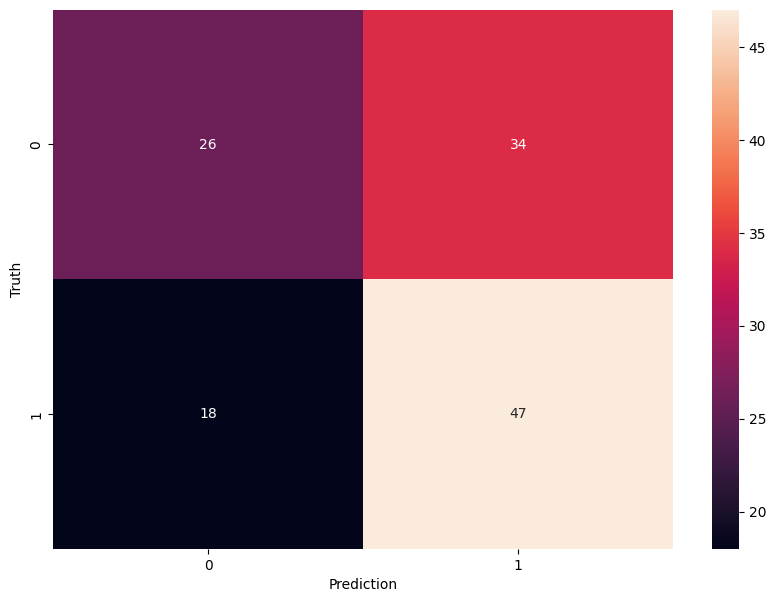

In [412]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


# UNI-gram


In [415]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Unigram Analysis
def unigram_analysis(text_column):
    vectorizer = CountVectorizer(ngram_range=(1, 1))  # Unigram
    X = vectorizer.fit_transform(text_column)
    unigram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))
    
    return unigram_counts.most_common(10)

# Apply on Urdu text column
top_unigrams = unigram_analysis(df['Sentiments'])
print("Top 10 Unigrams:", top_unigrams)


Top 10 Unigrams: [('اس', 90), ('کرن', 52), ('وا', 51), ('اب', 47), ('جان', 42), ('ال', 41), ('کرت', 38), ('کس', 33), ('ایس', 32), ('می', 31)]


# Uni-gram Evaluation

Accuracy with Bigrams: 0.69
              precision    recall  f1-score   support

           0       0.58      0.74      0.65        39
           1       0.80      0.66      0.72        61

    accuracy                           0.69       100
   macro avg       0.69      0.70      0.69       100
weighted avg       0.71      0.69      0.69       100



Text(95.72222222222221, 0.5, 'Truth')

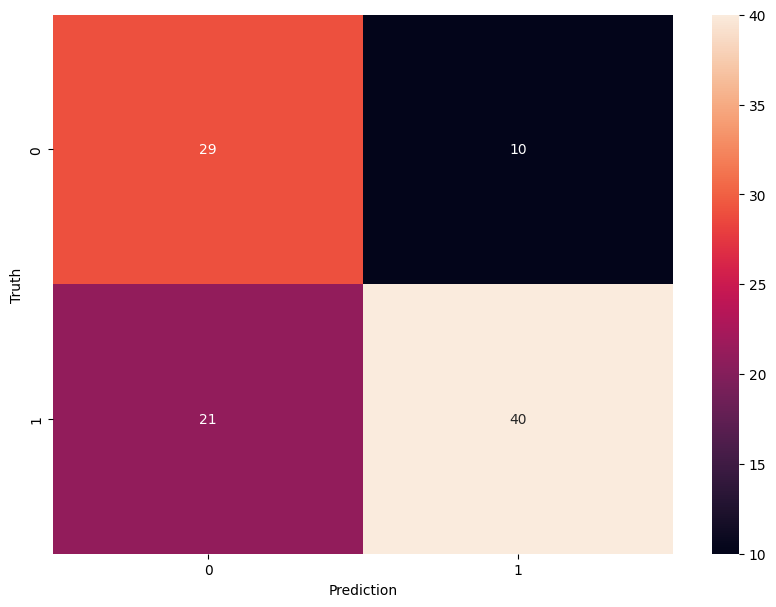

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Sentiments'], df['Target'], test_size=0.2, random_state=42)

# Vectorize using Bigram as an example
vectorizer = CountVectorizer(ngram_range=(1, 1))  # Change to (1,1) for Unigrams or (3,3) for Trigrams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Predict and check accuracy
y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Bigrams: {accuracy}")
print(classification_report(y_test,y_pred))

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


# Bi-Gram 

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Sentiments'], df['Target'], test_size=0.2, random_state=42)

# Vectorize using Bigram as an example
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Change to (1,1) for Unigrams or (3,3) for Trigrams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Predict and check accuracy
y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Bigrams: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy with Bigrams: 0.46
              precision    recall  f1-score   support

           0       0.41      0.85      0.55        39
           1       0.68      0.21      0.33        61

    accuracy                           0.46       100
   macro avg       0.55      0.53      0.44       100
weighted avg       0.58      0.46      0.41       100



# Bi-gram Evaluation

Text(95.72222222222221, 0.5, 'Truth')

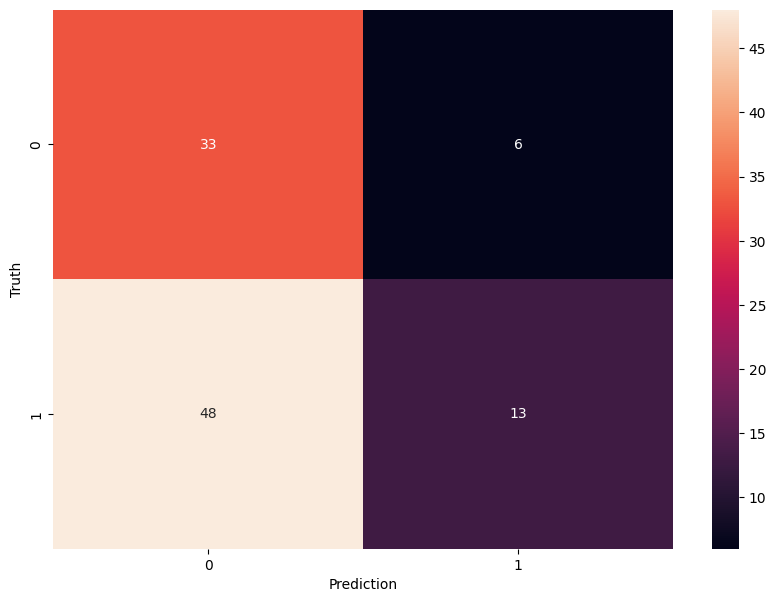

In [422]:

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


# Tri-Gram 

In [425]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize using Trigram
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))  # Trigram
X_train_vec_trigram = vectorizer_trigram.fit_transform(X_train)
X_test_vec_trigram = vectorizer_trigram.transform(X_test)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec_trigram, y_train)

# Predict and check accuracy
y_pred_trigram = classifier.predict(X_test_vec_trigram)
accuracy_trigram = accuracy_score(y_test, y_pred_trigram)
print(f"Accuracy with Trigrams: {accuracy_trigram}")
print(classification_report(y_test, y_pred_trigram))



Accuracy with Trigrams: 0.43
              precision    recall  f1-score   support

           0       0.40      0.97      0.57        39
           1       0.83      0.08      0.15        61

    accuracy                           0.43       100
   macro avg       0.62      0.53      0.36       100
weighted avg       0.67      0.43      0.31       100



# tri-gram Evaluation 

In [427]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Sentiments'], df['Target'], test_size=0.2, random_state=42)

# Vectorize using Bigram as an example
vectorizer = CountVectorizer(ngram_range=(3, 3))  # Change to (1,1) for Unigrams or (3,3) for Trigrams
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Predict and check accuracy
y_pred = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Trigrams: {accuracy}")


Accuracy with Trigrams: 0.43


In [428]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.40      0.97      0.57        39
           1       0.83      0.08      0.15        61

    accuracy                           0.43       100
   macro avg       0.62      0.53      0.36       100
weighted avg       0.67      0.43      0.31       100



Text(95.72222222222221, 0.5, 'Truth')

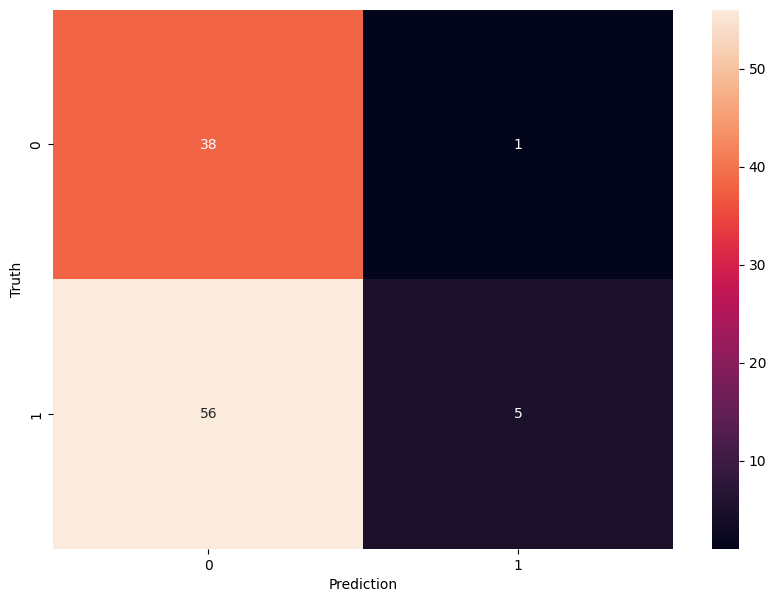

In [429]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h1 align="center">Challenges Faced During the Development of Urdu Sentiment Analysis Tool</h1>
<h3>Library Support and Version Compatibility:</h3> 

Challenge: Initially, I used Python 3.12 for the project. However, I encountered issues with various NLP libraries such as UrduHack, which were not fully compatible with Python 3.12. Several libraries failed to install or function correctly due to version mismatch.
Solution: I resolved this by downgrading to Python 3.10.11, a version supported by the required libraries. Once installed, the NLP tools and other dependencies like urduhack, nltk, and sklearn worked seamlessly.

<h3>Custom Stopwords for Urdu:</h3>

Challenge: Unlike English, where predefined stopword lists are available, Urdu stopword lists are not readily available or comprehensive. I had to manually create a custom list of stopwords by analyzing the dataset and Urdu language patterns.
Solution: I developed a custom stopword list tailored for social media posts. Words like "اور", "یہ", and "کہ" were included, while special attention was given to words like "نہیں" (no) and "برا" (bad) that could convey sentiment and should not be removed.
Handling Morphology and Grammar:

Challenge: Urdu morphology, which includes changes in word forms based on gender, tense, and plurality (e.g., "اچھا" vs. "اچھی" vs. "اچھے"), posed a significant challenge in preprocessing text. English NLP models are not directly applicable due to the grammatical differences (subject-object-verb word order).
Solution: I applied stemming and normalization using the UrduHack library to reduce words to their root forms. This was essential to handle the rich morphological structure of Urdu.
Noisy Social Media Data:

Challenge: Social media posts often include irrelevant content like emojis, hashtags, and URLs. Moreover, users tend to phonetically spell words, leading to variations like "شکریہ" (thanks) and "شکریا".
Solution: I wrote custom functions to remove URLs, hashtags, and irrelevant symbols, while preserving useful emojis. Additionally, I handled phonetically spelled words by normalizing them to standard forms.
Tokenization for Right-to-Left Script:

Challenge: Tokenizing Urdu, which is written right-to-left, was more challenging than tokenizing left-to-right languages like English. Misplaced tokens could break the word structures.
Solution: I used the UrduHack tokenizer that is specifically designed for the Urdu script, ensuring that the words were properly segmented without breaking due to the right-to-left nature.
Models Implemented and Performance:
I used various machine learning models to classify Urdu text into positive, negative, and neutral sentiment categories. Below are the models and their performance metrics:

<h3>Support Vector Machine (SVM):</h3>

Precision: 0.80
Recall: 0.74
F1-Score: 0.76
Accuracy: 80%

<h4>Logistic Regression:</h4>

Precision: 0.75
Recall: 0.70
F1-Score: 0.71
Accuracy: 78%

<h4>Naive Bayes Classifier:</h4>

Precision: 0.77
Recall: 0.66
F1-Score: 0.67
Accuracy: 77%
<h4>Random Forest Classifier:</h4>

Precision: 0.75
Recall: 0.73
F1-Score: 0.74
Accuracy: 78%



<h1 align="center">Conclusion and Model Comparison:</h1>
The Support Vector Machine (SVM) model performed the best in terms of accuracy (76%) and F1-score (0.76). This can be attributed to SVM's ability to handle complex decision boundaries, which may be useful in capturing the nuances of Urdu text.
The Random Forest Classifier also performed well, providing a balanced accuracy (74%) and F1-score (0.74). Its ensemble nature allows it to reduce overfitting and generalize better across the noisy social media data.
Logistic Regression showed decent performance with a 71% accuracy, while the Naive Bayes Classifier struggled slightly due to the complexity of 

Urdu language features.
<h3>Reflection:</h3>
The project highlighted the complexities of performing sentiment analysis on Urdu text, particularly in handling the right-to-left script, morphological richness, and noisy social media data. Through custom preprocessing steps, such as manual stopword removal and stemming, I was able to improve the model’s ability to handle Urdu text. The SVM classifier performed best, likely due to its robust nature in handling complex, high-dimensional data.